# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
X.head() #esta matriz no tiene la columna objetivo

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       train_size=0.8)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression as LinReg

In [7]:
linreg=LinReg() #inicio el modelo

linreg.fit(X_train, y_train) #entreno el modelo

LinearRegression()

In [8]:
y_pred_train = linreg.predict(X_train) #predicciones del conjunto de entrenamiento
y_pred_train

array([[2.45702021],
       [2.7801045 ],
       [1.28439738],
       ...,
       [2.37073237],
       [1.41998965],
       [1.61826135]])

In [9]:
y_pred_test = linreg.predict(X_test) #predicciones del test
y_pred_test

array([[1.99559309],
       [2.01037091],
       [1.31631225],
       ...,
       [2.08727357],
       [3.50189743],
       [1.06313767]])

## 3. Calculate and print R-squared for both the training and the testing set.

*R2 determina si el modelo de regresión lineal se ajusta bien, variando entre 0 y 1.*

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y_train, y_pred_train)

0.6059147747495395

In [12]:
r2_score(y_test, y_pred_test)

0.6070523543259597

In [13]:
print(f"R2 para el conjunto de entrenamiento es {r2_score(y_train, y_pred_train)} y R2 para el test es {r2_score(y_test, y_pred_test)}")

R2 para el conjunto de entrenamiento es 0.6059147747495395 y R2 para el test es 0.6070523543259597


*Un R² de 0.603 para el conjunto de entrenamiento significa que el modelo explica aproximadamente el 60.3% de la variabilidad de los datos de entrenamiento, mientras que el del test es un 61,7% lo que presentan comportamientos similares*

## 4. Calculate and print mean squared error for both the training and the testing set.

In [14]:
from sklearn.metrics import mean_squared_error as mse

In [15]:
mse(y_train, y_pred_train)

0.5246107560727105

In [16]:
mse(y_test, y_pred_test)

0.5236326750199519

In [17]:
print(f"El MSE para el conjunto de entrenamiento es {mse(y_train, y_pred_train)} y MSE para el test es {mse(y_test, y_pred_test)}")

El MSE para el conjunto de entrenamiento es 0.5246107560727105 y MSE para el test es 0.5236326750199519


*Estos valores de MSE son similares entre el conjunto de entrenamiento y el conjunto de prueba, lo cual sugiere que el modelo está generalizando de manera relativamente consistente entre ambos conjuntos.*

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [18]:
from sklearn.metrics import mean_absolute_error as mae

In [19]:
mae(y_train, y_pred_train)

0.5320850822143889

In [20]:
mae(y_test, y_pred_test)

0.5287344503560938

In [21]:
print(f"El MAE para el conjunto de entrenamiento es {mae(y_train, y_pred_train)} y MAE para el test es {mae(y_test, y_pred_test)}")

El MAE para el conjunto de entrenamiento es 0.5320850822143889 y MAE para el test es 0.5287344503560938


*Generalmente, valores de MAE más bajos indican un mejor ajuste del modelo a los datos.*

## Classification Model Evaluation

In [22]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [23]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [25]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       train_size=0.80
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)

C:\Users\ccior\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
y_pred_train_lg = logreg.predict(X_train)

In [38]:
y_pred_lg = logreg.predict(X_test)

In [40]:
y_pred_test_lg

array([1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 0, 2])

In [41]:
y_pred_train_lg

array([1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1,
       0, 1, 1, 2, 1, 1, 2, 2, 0, 1])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [36]:
from sklearn.metrics import accuracy_score as acc

In [42]:
acc(y_train,y_pred_train_lg)

0.975

In [43]:
acc(y_test,y_pred_test_lg)

0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [44]:
from sklearn.metrics import balanced_accuracy_score

In [45]:
balanced_accuracy_score(y_train,y_pred_train_lg) #train

0.9754065040650407

In [47]:
balanced_accuracy_score(y_test,y_pred_test_lg) #test

0.9666666666666667

## 10. Calculate and print the precision score for both the training and the testing set.

In [49]:
from sklearn.metrics import precision_score

In [58]:
precision_score(y_train,y_pred_train_lg,average = "micro")

0.975

In [61]:
precision_score(y_train,y_pred_train_lg,average = "weighted")

0.9751981707317072

In [60]:
precision_score(y_test,y_pred,average = "micro")

0.9666666666666667

In [54]:
precision_score(y_test,y_pred,average = "weighted")

0.9700000000000001

## 11. Calculate and print the recall score for both the training and the testing set.

In [62]:
from sklearn.metrics import recall_score

In [63]:
recall_score(y_test,y_pred,average = "micro")

0.9666666666666667

*El conjunto de testeo, el modelo alcanzó una puntuación de recall de aproximadamente 96.67%. Esta puntuación se obtiene considerando los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en todas las clases del conjunto de prueba.*

In [64]:
recall_score(y_train,y_pred_train,average = "micro")

0.975

*En ambos casos, una puntuación alta de recall indica que el modelo es bueno para identificar correctamente casos positivos entre todos los casos positivos reales en los conjuntos de datos respectivos.*

## 12. Calculate and print the F1 score for both the training and the testing set.

In [65]:
from sklearn.metrics import f1_score

In [66]:
f1_score(y_test,y_pred,average = "micro" )

0.9666666666666667

In [67]:
f1_score(y_train,y_pred_train, average = "micro" )

0.975

## 13. Generate confusion matrices for both the training and the testing set.

In [70]:
from sklearn.metrics import confusion_matrix as cm

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
y_pred_train_lg = logreg.predict(X_train)

In [79]:
y_pred_test_lg = logreg.predict(X_test)

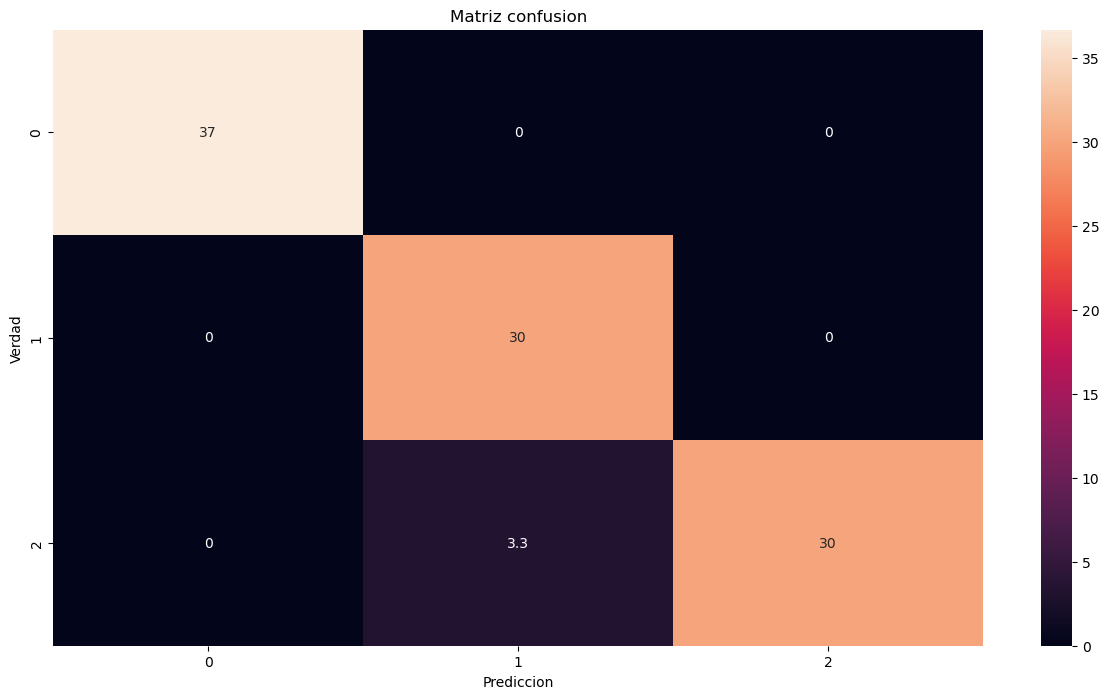

In [81]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_test_lg)/cm(y_test, y_pred_test_lg).sum() * 100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

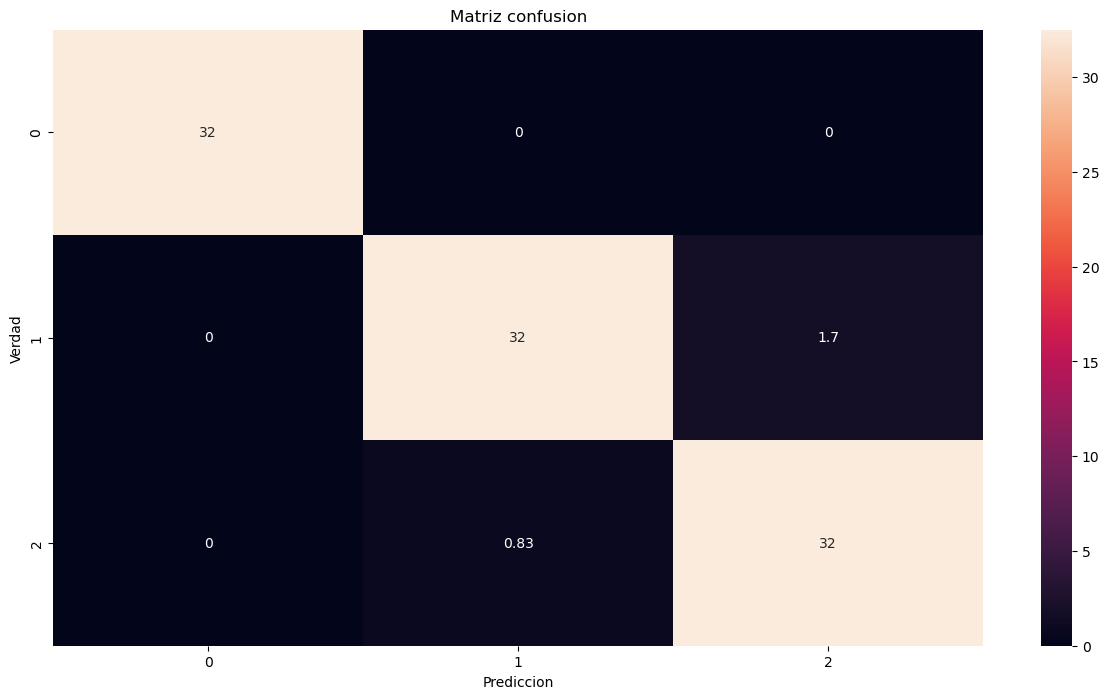

In [87]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_train_lg )/cm(y_train, y_pred_train_lg).sum()*100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.